In [46]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [47]:
df = pd.read_csv("CENTRALBANK_NEW_5Y.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,24-04-2017,102.800003,103.349998,101.250000,102.150002,102.150002,212720
1,25-04-2017,102.000000,103.500000,101.900002,102.150002,102.150002,160108
2,26-04-2017,102.900002,104.699997,101.750000,102.449997,102.449997,416135
3,27-04-2017,102.550003,103.250000,102.250000,102.550003,102.550003,102139
4,28-04-2017,103.199997,107.900002,102.500000,105.949997,105.949997,1132635


In [48]:
close = df["Close"]
close.shape
close

0       102.150002
1       102.150002
2       102.449997
3       102.550003
4       105.949997
           ...    
1231     19.350000
1232     19.850000
1233     19.900000
1234     19.850000
1235     19.600000
Name: Close, Length: 1236, dtype: float64

In [49]:
close = close.dropna()
close.shape

(1236,)

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
tmp = scaler.fit(np.array(close).reshape(-1,1))
new_df = scaler.transform(np.array(close).reshape(-1,1))

 
print(new_df)

[[0.83062331]
 [0.83062331]
 [0.83333329]
 ...
 [0.08762421]
 [0.08717254]
 [0.08491418]]


In [51]:
training_size=int(len(new_df)*0.67)
test_size=len(new_df)-training_size
train_data,test_data=new_df[0:training_size,:],new_df[training_size:len(new_df),:1]

print(train_data.shape)
print(test_data.shape)

(828, 1)
(408, 1)


In [52]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [53]:
time_step=100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
#print(X_train, Y_train)

(727, 100) (727,) (307, 100) (307,)


In [54]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
print(X_train.shape, X_test.shape)
#print(X_train, Y_train)

(727, 100, 1) (307, 100, 1)


In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_6 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_10 (LSTM)              (None, 100, 50)           20200     
                                                                 
 dropout_7 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trai

In [56]:
model.fit(X_train,Y_train,validation_data=(X_test, Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 16s 387ms/step - loss: 0.0356 - val_loss: 5.7350e-04
Epoch 2/100
12/12 [==============================] - 3s 245ms/step - loss: 0.0065 - val_loss: 4.6324e-04
Epoch 3/100
12/12 [==============================] - 3s 240ms/step - loss: 0.0024 - val_loss: 5.3606e-04
Epoch 4/100
12/12 [==============================] - 3s 280ms/step - loss: 0.0026 - val_loss: 3.2149e-04
Epoch 5/100
12/12 [==============================] - 3s 291ms/step - loss: 0.0022 - val_loss: 3.0559e-04
Epoch 6/100
12/12 [==============================] - 3s 241ms/step - loss: 0.0021 - val_loss: 3.5428e-04
Epoch 7/100
12/12 [==============================] - 3s 241ms/step - loss: 0.0020 - val_loss: 2.8391e-04
Epoch 8/100
12/12 [==============================] - 3s 240ms/step - loss: 0.0019 - val_loss: 3.0826e-04
Epoch 9/100
12/12 [==============================] - 3s 237ms/step - loss: 0.0020 - val_loss: 2.8955e-04
Epoch 10/100
12/12 [==============================] - 

12/12 [==============================] - 3s 235ms/step - loss: 8.1386e-04 - val_loss: 1.3773e-04
Epoch 78/100
12/12 [==============================] - 3s 235ms/step - loss: 6.6630e-04 - val_loss: 1.3653e-04
Epoch 79/100
12/12 [==============================] - 3s 237ms/step - loss: 7.2491e-04 - val_loss: 1.5316e-04
Epoch 80/100
12/12 [==============================] - 3s 237ms/step - loss: 7.0532e-04 - val_loss: 1.5837e-04
Epoch 81/100
12/12 [==============================] - 3s 237ms/step - loss: 6.5524e-04 - val_loss: 1.3683e-04
Epoch 82/100
12/12 [==============================] - 3s 238ms/step - loss: 6.4529e-04 - val_loss: 1.8053e-04
Epoch 83/100
12/12 [==============================] - 3s 237ms/step - loss: 9.0059e-04 - val_loss: 1.4879e-04
Epoch 84/100
12/12 [==============================] - 3s 237ms/step - loss: 7.3991e-04 - val_loss: 1.4706e-04
Epoch 85/100
12/12 [==============================] - 3s 235ms/step - loss: 7.0898e-04 - val_loss: 1.4803e-04
Epoch 86/100
12/12 [===

In [57]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
print(train_predict.shape, test_predict.shape)

(727, 1) (307, 1)


In [58]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
print(test_predict)

[[14.63975 ]
 [14.596388]
 [14.523245]
 [14.385443]
 [14.207821]
 [14.034393]
 [13.928982]
 [13.905223]
 [13.955712]
 [14.075886]
 [14.265673]
 [14.507461]
 [14.771   ]
 [15.002572]
 [15.172297]
 [15.257927]
 [15.255451]
 [15.311599]
 [15.645149]
 [16.496466]
 [17.729788]
 [19.039013]
 [20.120588]
 [20.866266]
 [21.299696]
 [21.448143]
 [21.334007]
 [20.989351]
 [20.487782]
 [19.897766]
 [19.279566]
 [18.73291 ]
 [18.353182]
 [18.13766 ]
 [18.07896 ]
 [18.15591 ]
 [18.31442 ]
 [18.466375]
 [18.524605]
 [18.428337]
 [18.162584]
 [17.803102]
 [17.42551 ]
 [17.06422 ]
 [16.748854]
 [16.497257]
 [16.320913]
 [16.260101]
 [16.278496]
 [16.345127]
 [16.452885]
 [16.581059]
 [16.793604]
 [17.036375]
 [17.32708 ]
 [17.61604 ]
 [17.857012]
 [17.981293]
 [17.972116]
 [17.841408]
 [17.61736 ]
 [17.344173]
 [17.072315]
 [16.84591 ]
 [16.676617]
 [16.563732]
 [16.498968]
 [16.499802]
 [16.563427]
 [16.662682]
 [16.767094]
 [16.86735 ]
 [16.980951]
 [17.176285]
 [17.425533]
 [17.708693]
 [17.989496]

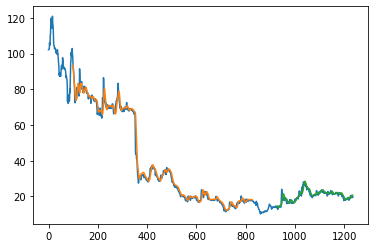

In [59]:
X = scaler.fit_transform(np.array(close).reshape(-1,1))
import matplotlib.pyplot as plt

look_back=100
trainPredictPlot = np.empty_like(X)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(X)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(X)-1, :] = test_predict
plt.plot(scaler.inverse_transform(X))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [60]:
model.save('centralbank_model.h5')